In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat as loadmat
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

# Suppress warnings`
warnings.filterwarnings("ignore")

In [2]:
import xy

# $因子描述：威廉变异离散量，刻画标的当前价格的强弱程度$

***(收盘价－开盘价)/(最高价－最低价)×成交量，再做加和，使用过去N个交易日的数据***  

## 计算

In [3]:
st_WVAD3 = (((xy.closes - xy.opens) / (xy.highs - xy.lows) * xy.volumes).T.rolling(3).sum()).T
st_WVAD4 = (((xy.closes - xy.opens) / (xy.highs - xy.lows) * xy.volumes).T.rolling(4).sum()).T
st_WVAD5 = (((xy.closes - xy.opens) / (xy.highs - xy.lows) * xy.volumes).T.rolling(5).sum()).T
st_WVAD6 = (((xy.closes - xy.opens) / (xy.highs - xy.lows) * xy.volumes).T.rolling(6).sum()).T
st_WVAD7 = (((xy.closes - xy.opens) / (xy.highs - xy.lows) * xy.volumes).T.rolling(7).sum()).T

In [4]:
st_WVAD_mean = st_WVAD3 + st_WVAD4 + st_WVAD5 + st_WVAD6 + st_WVAD7 
st_index_WVAD_mean = xy.read_Factor(xy.trd_dates,'st_WVAD',df=st_WVAD_mean)

## 评估

### cl-cl

-0.04837567747067128
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

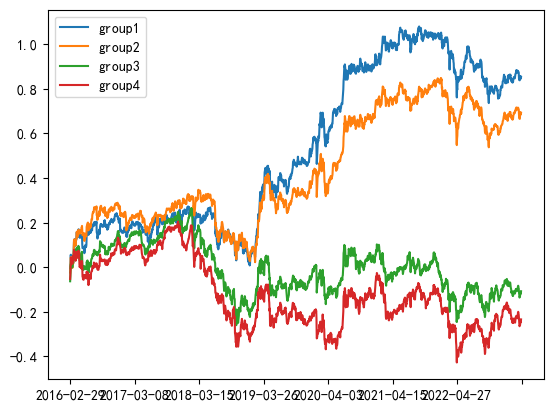

In [5]:
# 分组收益率
gr_st_index_WVAD_mean = xy.cal_rate_group(
    st_index_WVAD_mean.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    group_num=4,
    masks=1
)
gr_st_index_WVAD_mean.cumsum().plot()

2002.0
yoy: 0.15419631776298084 
 mdd: -0.2565347037683263 
 sharpe: 0.9033790983574425 
 rankIC: -0.03108571428571429 
 rankIR: -0.040504730447586755 
 win%: 0.5108571428571429 
 gain_loss%: -1.1190956089936333


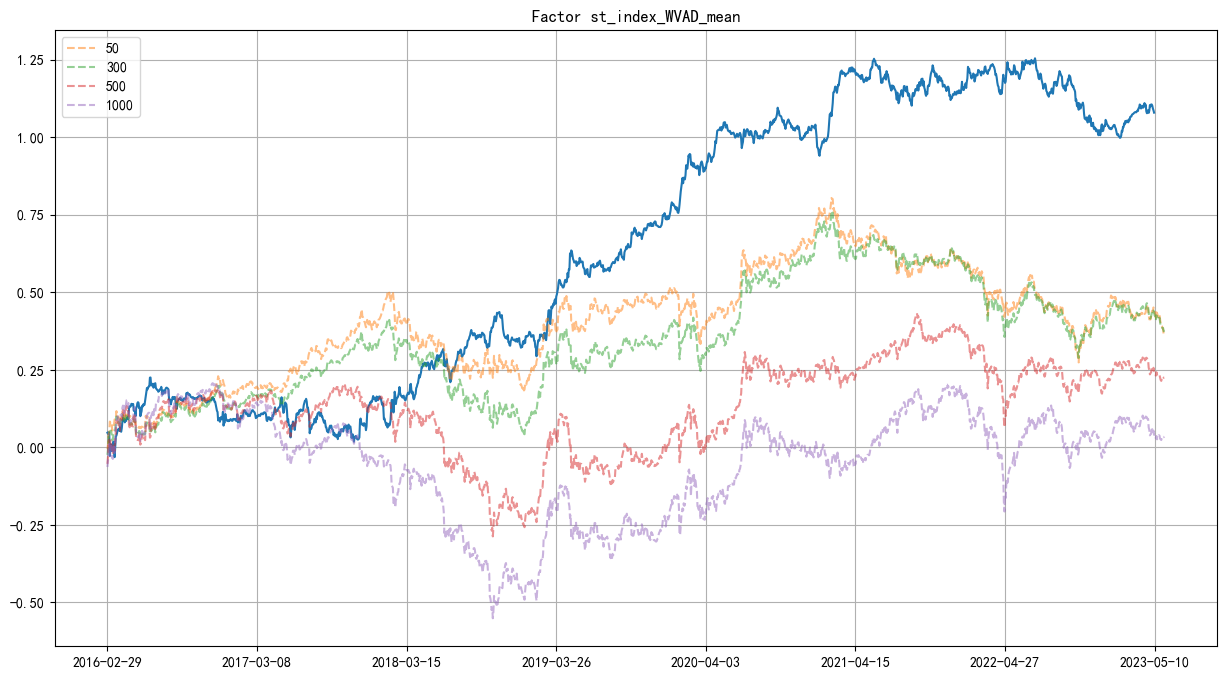

In [6]:
# 单因子强弱
st_index_WVAD_mean_select, st_index_WVAD_mean_rets = xy.single_Factor_backtest(
    st_index_WVAD_mean.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    _side=-1,
    fee=0.000,
    name='st_index_WVAD_mean'
)

-0.03108571428571429

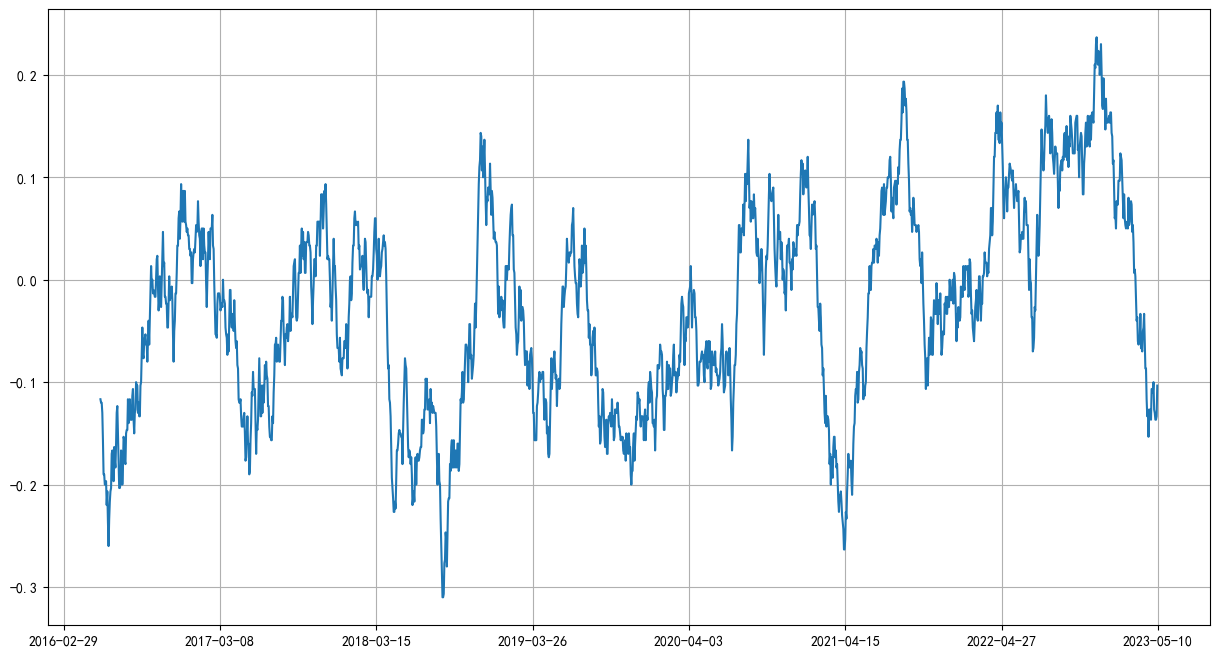

In [7]:
# 因子截面IC趋势
rankIC = xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False).corrwith(st_index_WVAD_mean.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False))
rankIC.rolling(60).mean().plot(figsize=(15,8),grid=1)
rankIC.mean()

### cl_op

-0.0604224812084335
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

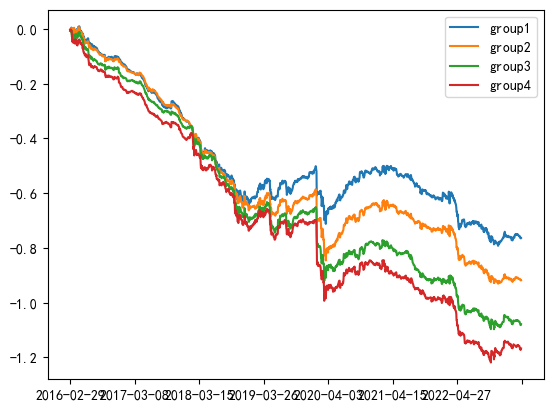

In [8]:
# 分组收益率
gr_st_index_WVAD_mean = xy.cal_rate_group(
    st_index_WVAD_mean.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    group_num=4,
    masks=1
)
gr_st_index_WVAD_mean.cumsum().plot()

2002.0
yoy: 0.057310418731903186 
 mdd: -0.07247008107654973 
 sharpe: 1.2042409806109986 
 rankIC: -0.04537142857142857 
 rankIR: -0.06206761377433953 
 win%: 0.528 
 gain_loss%: -1.1311776454046738


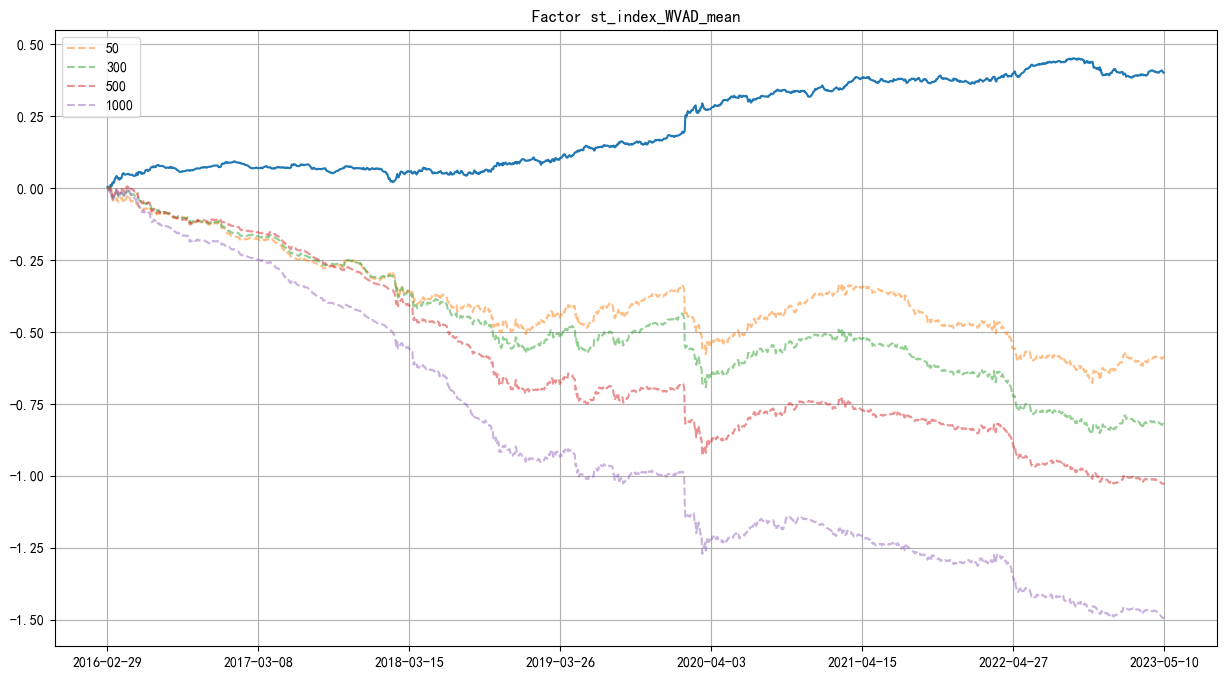

In [9]:
# 单因子强弱
st_index_WVAD_mean_select, st_index_WVAD_mean_rets = xy.single_Factor_backtest(
    st_index_WVAD_mean.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    _side=-1,
    fee=0.000,
    name='st_index_WVAD_mean'
)

-0.04537142857142857

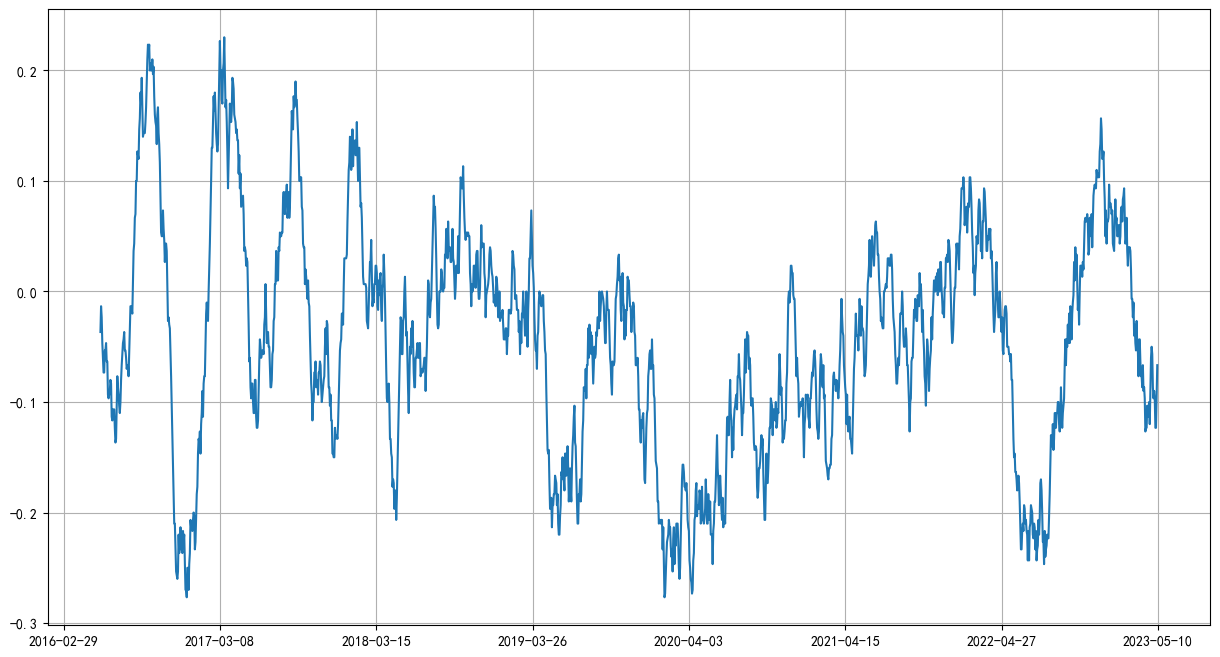

In [10]:
# 因子截面IC趋势
rankIC = xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False).corrwith(st_index_WVAD_mean.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False))
rankIC.rolling(60).mean().plot(figsize=(15,8),grid=1)
rankIC.mean()

In [25]:
(-st_index_VDIFF_mean).to_csv(r'E:\PyProject\factors\NewFactor\st_index_VDIFF_mean.csv')